In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.figsize"]=(20,10)

rcParams - You can control the defaults of almost every property in Matplotlib: figure size and DPI, line width, color and style, axes, axis and grid properties, text and font properties and so on. The matplotlibrc is read at startup to configure Matplotlib.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.groupby('area_type').count()

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


Uppar itna aache se pata nahi chal pa raha hai,agar values kam aayi matlb null values hai

In [6]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

*Drop features which are not important to build our model*

In [8]:
df.drop(['area_type','society','balcony','availability'],axis=1,inplace=True)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


**Data cleaning, handling NA values**

In [9]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

We have enough data values, we can drop these litte set of null values

In [10]:
df1 = df.dropna()

In [11]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

I will split values of each row(x) ,and make [0] as value store in new column

In [12]:
df1['bhk'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))
df1['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
df1.drop('size',axis=1,inplace=True)
df1.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


*Exploring total_sq feet*

In [14]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

1133 - 1384 to be changed as average

Make a function to check wheather the total_sqft value is float or not, if value is not float, return those values

In [15]:
def is_float(x):
    try: 
        float(x)
    except:
        return False
    return True

In [16]:
df1['total_sqft'].apply(is_float)

0        True
1        True
2        True
3        True
4        True
         ... 
13315    True
13316    True
13317    True
13318    True
13319    True
Name: total_sqft, Length: 13246, dtype: bool

The following code gives me dataframe with false values (values that are not int in total_sqft)

In [17]:
df1[~df1['total_sqft'].apply(is_float)].head(10)  # ~ was added to display all the false values -> ~ &  false = ture -> display false

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


Ignoring the sq meter and perch, changing the range into average

In [18]:
def convert_sqft_to_num(x):
    tokens = x.split('-')   # split is a python function
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
convert_sqft_to_num('2164')

2164.0

In [20]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [21]:
convert_sqft_to_num('34.46Sq. Meter')

this returns none

In [22]:
df2 = df1.copy()   # changes in df1 will not be reflected back on df2

In [23]:
df2['total_sqft'] = df2['total_sqft'].apply(convert_sqft_to_num)

In [24]:
df2[~df2['total_sqft'].apply(is_float)].head(10)  # removed such values

,location,total_sqft,bath,price,bhk


In [25]:
df2.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

We got total_sqft as average

In [26]:
df2.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [27]:
df2.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

No issues with bath

In [28]:
df2.price.unique()   # all are numbers, peas

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [29]:
df2.isna().sum()

location       0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [30]:
df3 = df2[df2.total_sqft.notnull()]

In [31]:
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


Removed useless columns, handled Na values and also handled the ranges in columns to numbers

**DATA CLEANING DONE**

**FEATURE ENGINEERING**

Having price per square feet helps in real estate

In [32]:
df5 = df3.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


handling locations column

In [33]:
len(df5.location.unique())   # 1298 unique values

1298

In [34]:
df5.location = df5.location.apply(lambda x: x.strip())  # strips of any extra space in the location name for simplicity

https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#:~:text=Remove%20leading%20and%20trailing%20characters,strings%20in%20Series%20with%20NaNs.

strip of any new line character to avoid problems

In [35]:
location_counts = df5.location.value_counts()
location_counts

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

put <10 occuring locations in others

In [36]:
len(location_counts[location_counts>10])

240

In [37]:
len(location_counts[location_counts<=10])

1047

1047 others me jayega

In [38]:
location_less_than_10 = location_counts[location_counts<=10]
location_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [39]:
len(df5.location.unique())

1287

In [40]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
df5.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


In [41]:
len(df5.location.unique())

241

*OHE ho jayega location me, abhi outliers remove kar lete hain*

# OUTLIERS REMOVAL

Outliers removal using business logic

In [42]:
df5[df5['total_sqft']/df5.bhk <=300]

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13300,Hosakerehalli,1500.0,6.0,145.0,5,9666.666667
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649
13306,other,1200.0,5.0,325.0,4,27083.333333


926 outliers

In [43]:
df5.shape

(13200, 6)

In [44]:
df6 = df5[~(df5.total_sqft/df5.bhk <= 300)]
df6.head()  # this dataframe will not contain values of bhk <= 300

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


Outlier removal in price per square feet

In [45]:
df6.price_per_sqft.describe()

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_sqft, dtype: float64

Remove outliers price_per_sqft per location

location beacause price depends on location

In [46]:
def remove_pps_outliers(df):
    df_out= pd.DataFrame()
    for key,subdf in df.groupby('location'):  # key is value of different locations and subdf is dataframe of each location
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[ (subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [47]:
df7 = remove_pps_outliers(df6)
df7.shape

(10018, 6)

In [48]:
df7.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


for a given location how does the 2 BHK and 3 BHK property prices look like 

using matplot lib

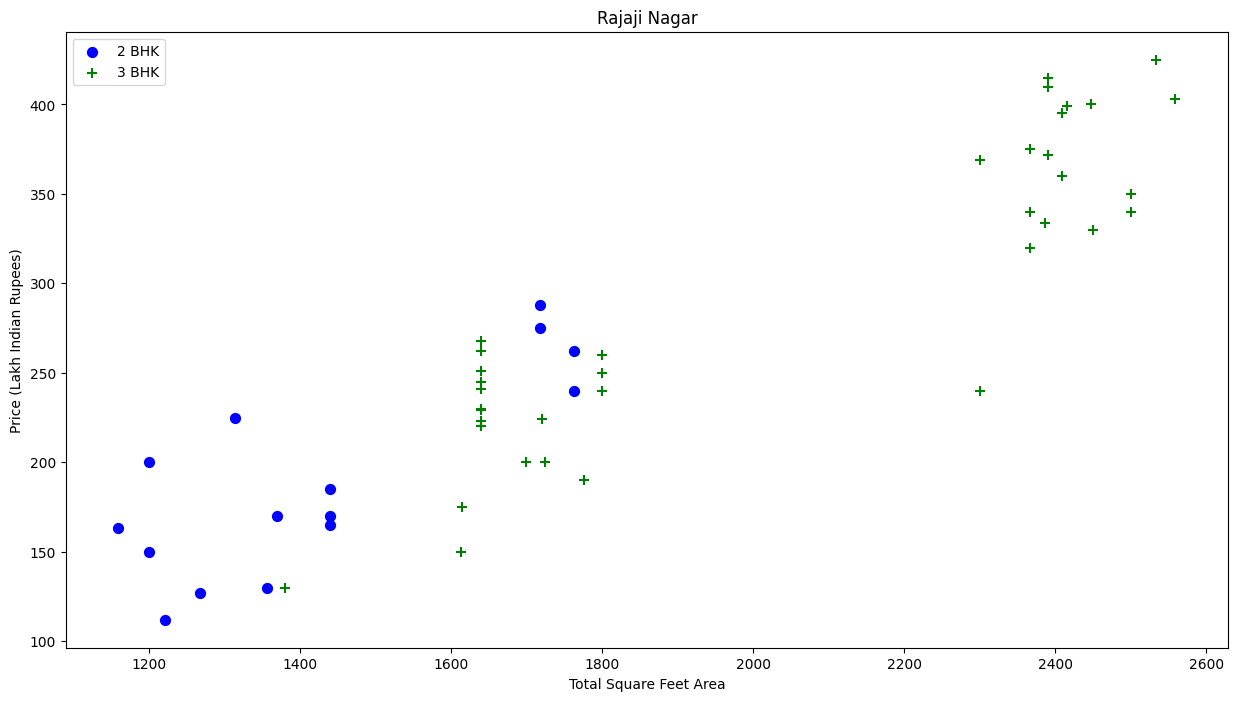

In [49]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,8)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

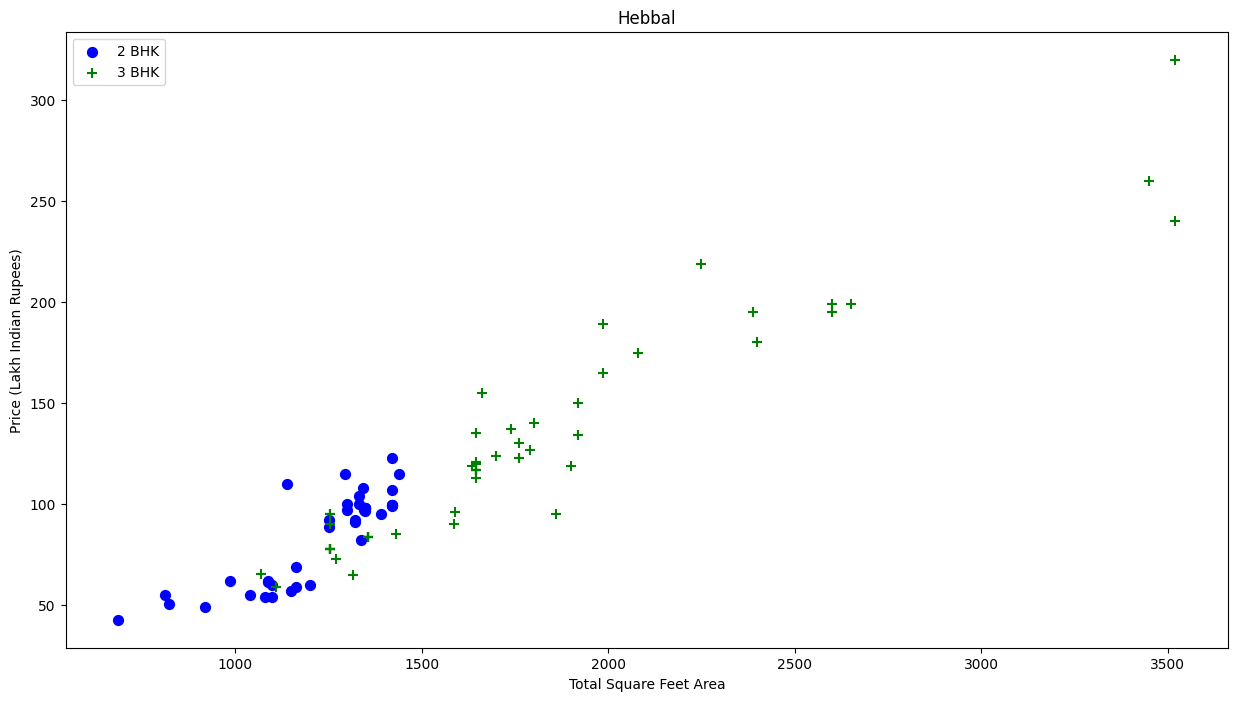

In [50]:
plot_scatter_chart(df7,"Hebbal")

removing outliers with 3bhk having less price than 2 bhk homes in same total_sqft area

if price of 3bhk of a location is less than 2bhk of same location, we remove 3 bhk

In [51]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):   # location has location, lofcation_df is dataframe per location
        bhk_stats = {}                                     
        for bhk, bhk_df in location_df.groupby('bhk'):     # bhk is no of bedroom, bhk_df (per location ) is a dataframe
            bhk_stats[bhk] = {                             # store mean value and count per location per no of bedroom
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):    # check for bhk's in that particular location
            stats = bhk_stats.get(bhk-1)                  # make stats dictionary which stores values of bhk-1
            if stats and stats['count']>5:                # if stats exist and no of houses with that no of bhk > 5
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)

    return df.drop(exclude_indices,axis='index')


df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7150, 6)

checking of outlier removal

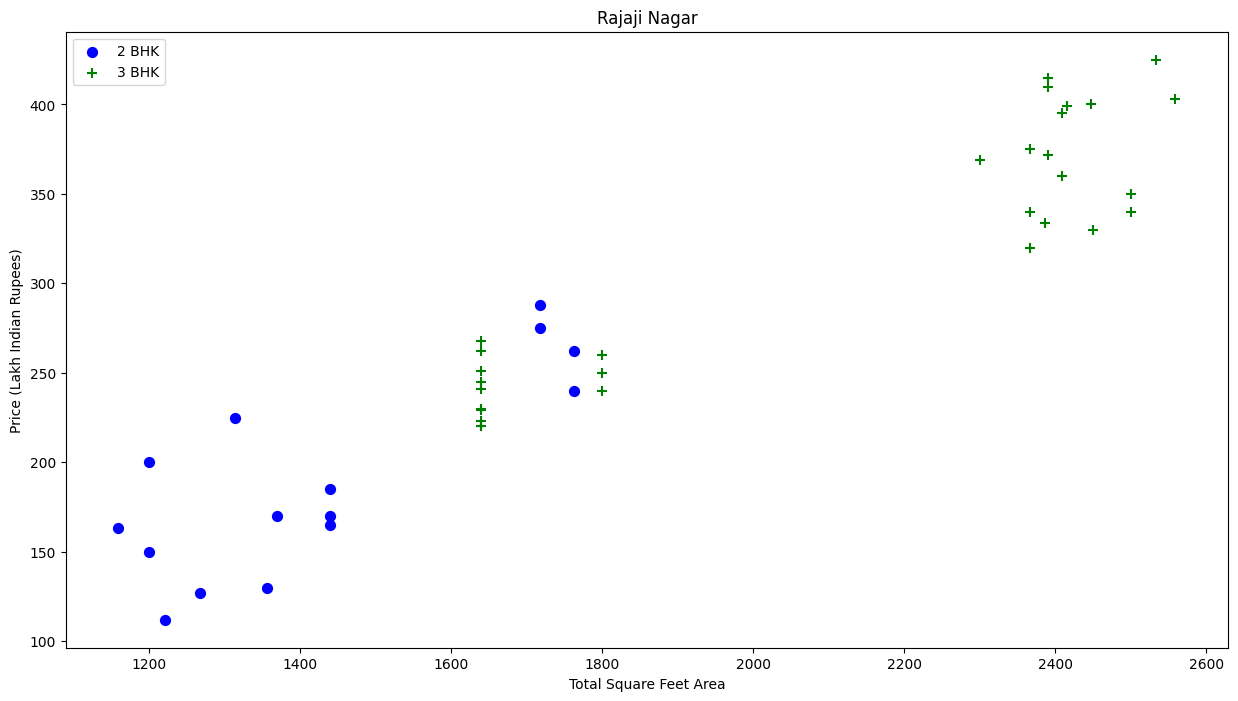

In [52]:
plot_scatter_chart(df8,"Rajaji Nagar")

looks clean

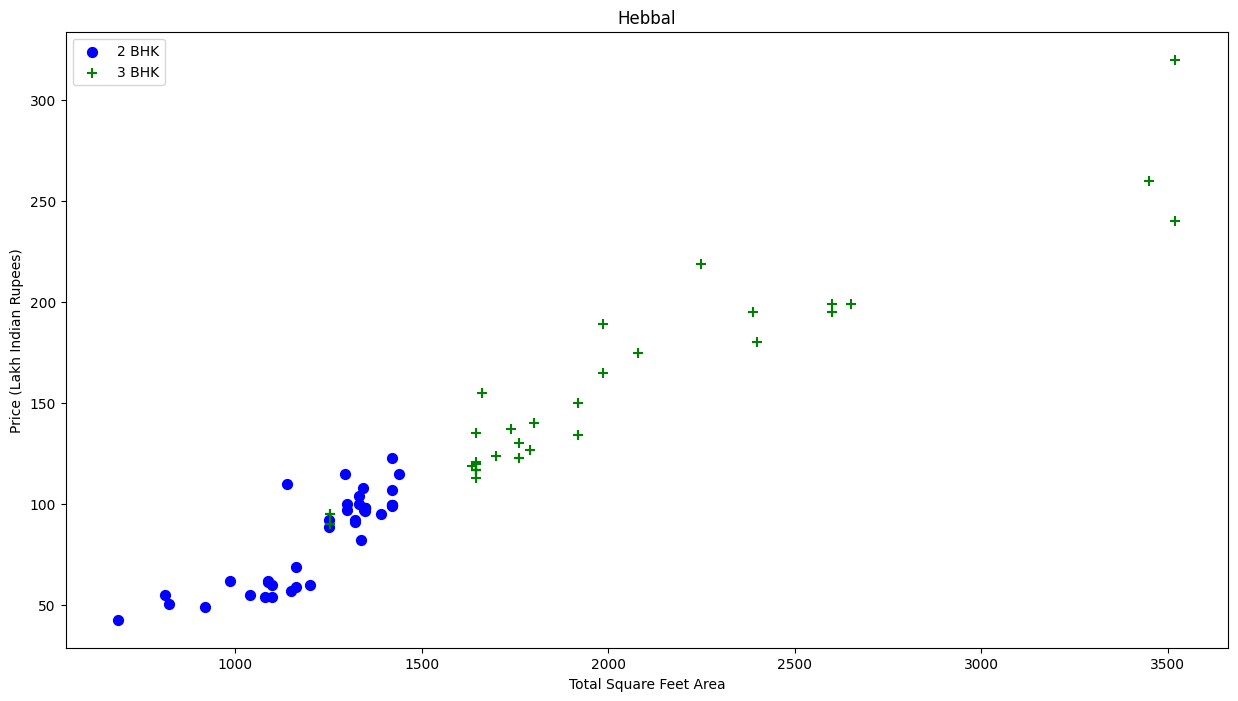

In [53]:
plot_scatter_chart(df8,"Hebbal")

some impurity is very difficult to remove

Checking price per sqft range using bell curve

Text(0, 0.5, 'price per square feet')

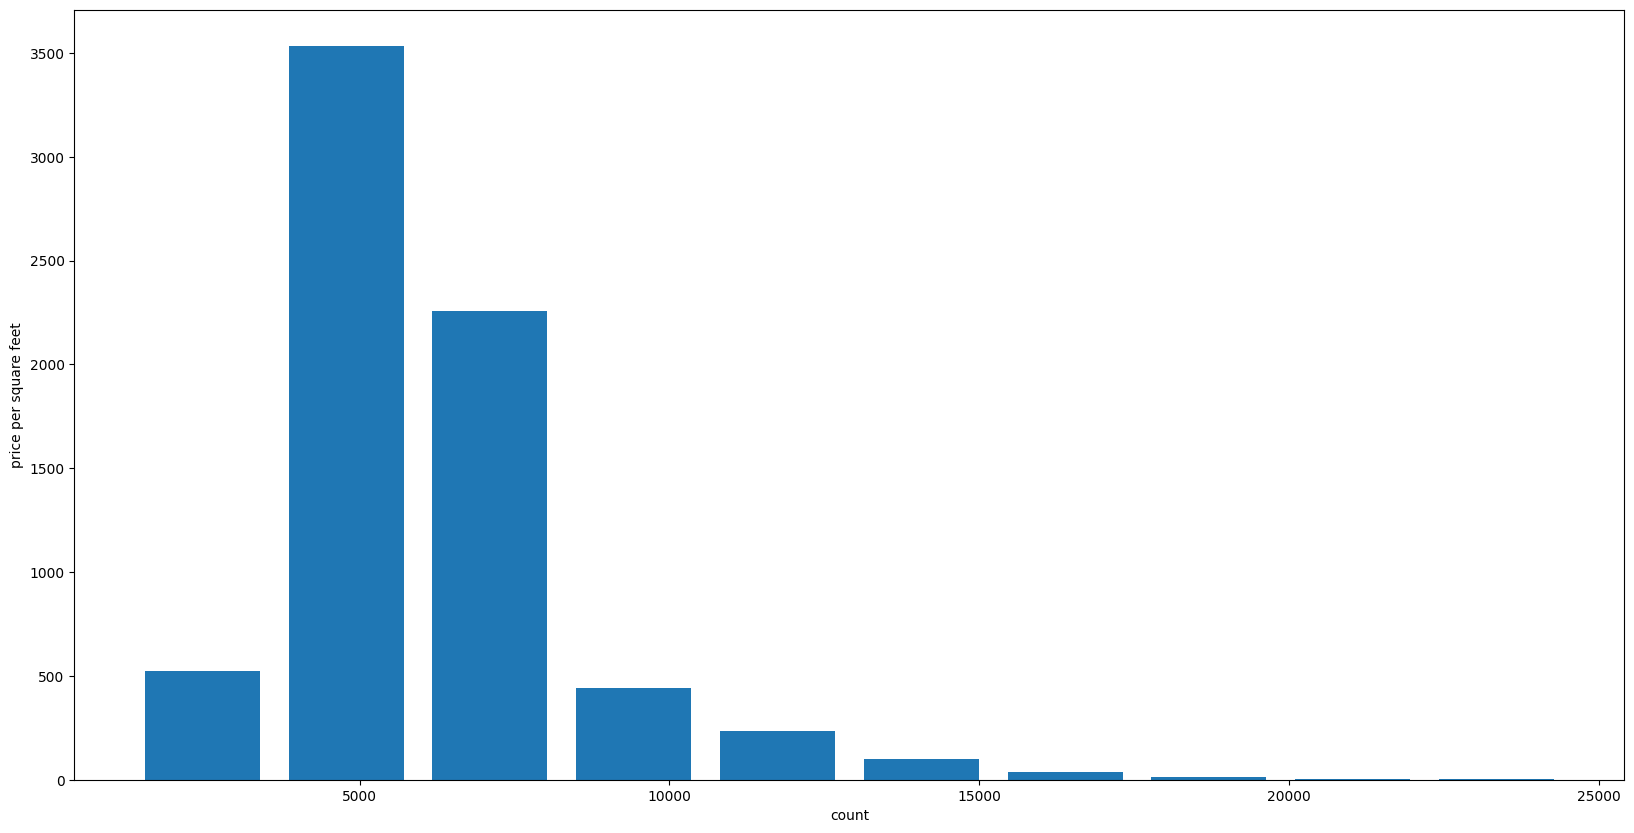

In [54]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel('count')
plt.ylabel('price per square feet')

Last- Bathroom outlier removal

In [55]:
df8.bath.unique()

array([ 4.,  3.,  2.,  8.,  5.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'count')

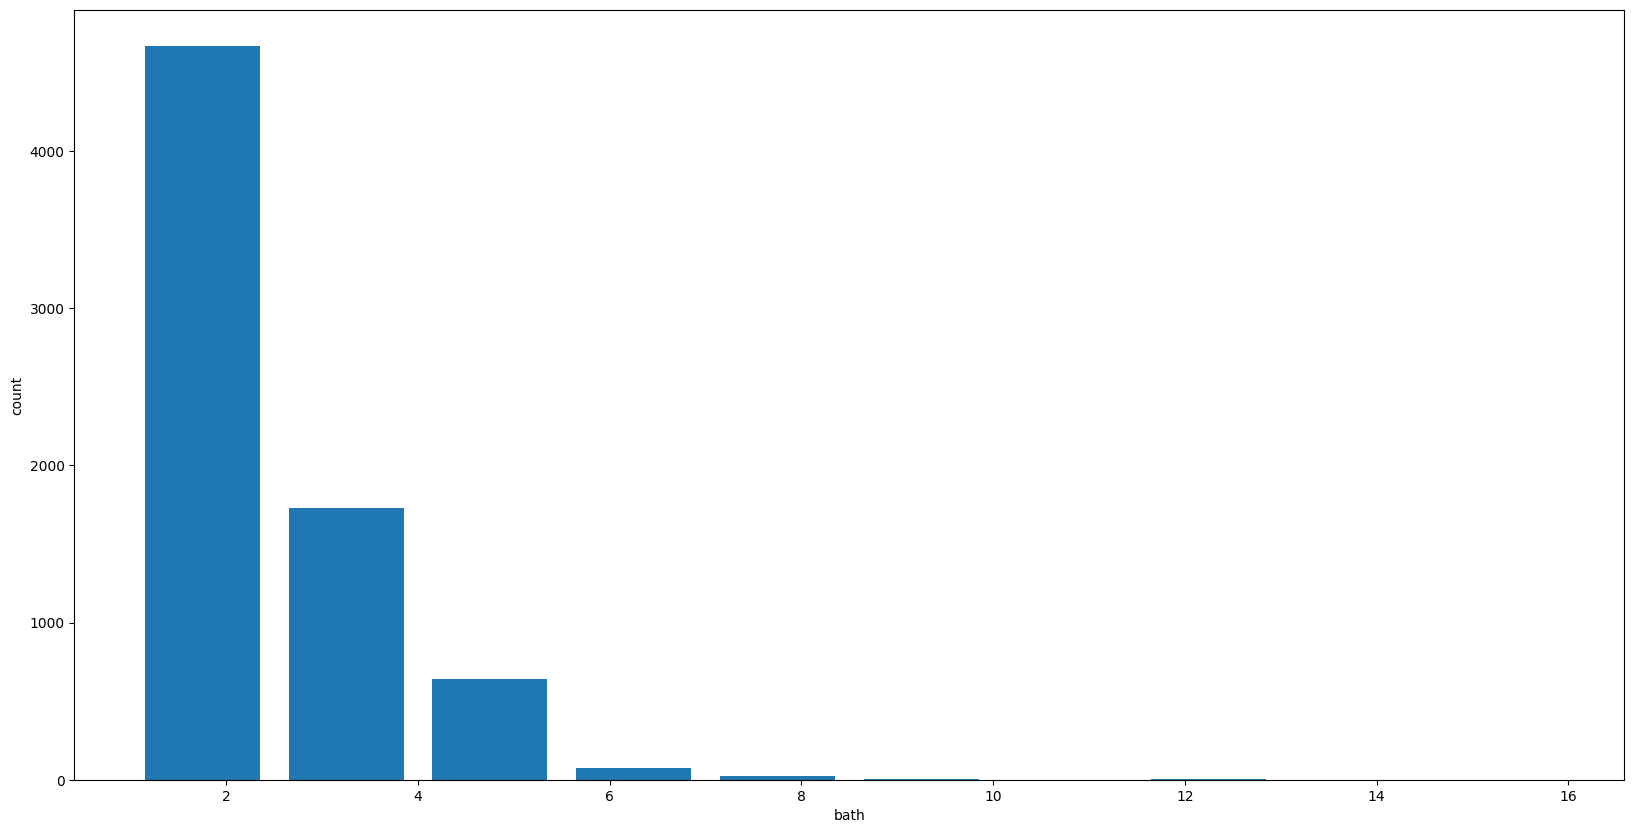

In [56]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel('bath')
plt.ylabel('count')

most of them are 2-4 only

In [57]:
len(df8[df8.bath>6])

36

bathrooms are usually no of bedroom+1

In [58]:
df8[df8.bath>=df8.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
34,2nd Stage Nagarbhavi,3000.0,8.0,451.0,6,15033.333333
508,Arekere,2710.0,6.0,142.0,4,5239.852399
558,BTM 2nd Stage,1260.0,5.0,185.0,3,14682.539683
785,Bannerghatta,3012.0,6.0,250.0,4,8300.132802
1040,Begur Road,2464.5,6.0,118.0,4,4787.989450
...,...,...,...,...,...,...
9672,other,3730.0,6.0,430.0,4,11528.150134
9701,other,6652.0,6.0,510.0,4,7666.867108
9872,other,5656.0,5.0,499.0,3,8822.489392
9980,other,6652.0,6.0,660.0,4,9921.828022


In [59]:
df9 = df8[~(df8.bath>=df8.bhk+2)]
df9.shape

(7074, 6)

**OUTLIER REMOVAL OVER**

Removal of dimesions

In [60]:
df10 = df9.drop('price_per_sqft',axis=1)
df10.head(2)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3


Get dummies for 240 locations

In [61]:
dummies = pd.get_dummies(df10.location)
dummies.head()


,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df11 = pd.concat((df10,dummies.drop('other',axis=1)),axis=1)  # dummy variable trap,remove other
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df11.drop('location',axis=1,inplace=True)
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Training model

In [64]:
df11.shape  # this is our dataframe shape

(7074, 244)

In [65]:
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
x = df11.drop('price',axis='columns')
y = df11.price

In [67]:
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,train_size=0.8,random_state=10)

In [69]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.7703955839534313

**Using K_Fold cross validation to measure the accuracy of our LinearRegression model**

In [70]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
scores=[]
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)
scores = cross_val_score(LinearRegression(),x,y,cv=cv)
scores

array([0.77039558, 0.84426211, 0.77127498, 0.80194342, 0.86206147])

Let's test other algorithms as well using GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [72]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [73]:
find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.838392,{'fit_intercept': False}
1,lasso,0.695563,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.716017,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Here linear regression gives me best output,so i will choose lf_clf only

In [74]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.7703955839534313

In [75]:
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


for prediction,we  cant write 240 columns ,we makes zeros array and make the 1's for the passed prediction data location

In [76]:
x.shape

(7074, 243)

In [77]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(x.columns==location)[0][0]   # find the index of location passed in dataframe

    arr = np.zeros(len(x.columns))   # what is the total no of columns
    arr[0] = sqft
    arr[1] = bath
    arr[2] = bhk
    if loc_index >= 0:
        arr[loc_index]= 1
    
    return lr_clf.predict([arr])[0]


In [78]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

90.06892804920498

In [79]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

89.60579207220799

In [80]:
predict_price('Indira Nagar',1000, 2, 2)

181.62377633098959

In [81]:
predict_price('Indira Nagar',1000, 3, 3)

181.16064035399262

Exporting the tested model to pickle file

In [82]:
import pickle
with open('banglore_home_prices_final.pickle','wb') as f:
    pickle.dump(lr_clf,f)

exporting sequence of columns in the d11 dataframe to a file ,which weill be useful in prediction application

In [83]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]  # converting all column names into lowercase by col.lower()
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

Project over :))

Need to make website now :)